#### [예제 0] 컨벌루션 및 맥스풀링 파이썬 코드 구현 및 컨벌루션 결과 이미지 확인

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


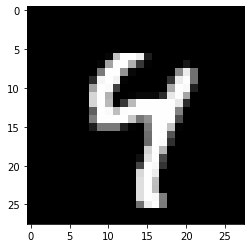

In [11]:
%tensorflow_version 1.x

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

# mnist download
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

plt.imshow(mnist.train.images[2].reshape(28,28), cmap='gray') # 2 번째 데이터

#### 이미지 필터 정의

In [16]:
import numpy as np

horizontal_filter = np.array([[1., 1., 1.], 
                             [0., 0., 0.], 
                             [-1., -1., -1.]])

vertical_filter = np.array([[1., 0., -1.],
                           [1., 0., -1.],
                           [1., 0., -1.]])

sharpen_filter = np.array([[0., -1., 0.],
                           [-1., 5., -1.],
                           [0., -1., 0.]])

blur_filter = np.array([[0.11, 0.11, 0.11],
                        [0.11, 0.11, 0.11],
                        [0.11, 0.11, 0.11]])

edge_1_filter = np.array([[1., 0., -1.],
                           [0., 0., 0.],
                           [-1., 0., 1.]])

edge_2_filter = np.array([[0., -1., 0.],
                           [-1., 4., -1.],
                           [0., -1., 0.]])

edge_3_filter = np.array([[-1., -1., -1.],
                           [-1., 8., -1.],
                           [-1., -1., -1.]])


test_image = mnist.train.images[2].reshape(28,28)
original_image_size = test_image.shape[0]
conv_output_size = int((original_image_size - 3)/1 + 1)
print('output size = ', conv_output_size)

output size =  26


In [17]:
filter_size = 3

def get_filtered_image(filter):
    filtered_image = np.zeros((conv_output_size, conv_output_size))
    for i in range(conv_output_size):
        for j in range(conv_output_size):
            # 합성곱 연산
            indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
            indice_sum = np.sum(indice_image)

            if(indice_sum > 255):
                indice_sum = 255
            filtered_image[i, j] = indice_sum
      
    return filtered_image

#### 컨볼루션 결과 이미지 확인

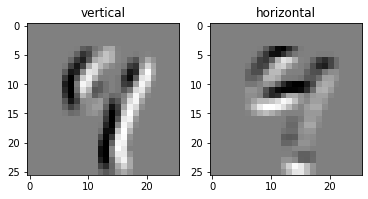

In [18]:
vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()

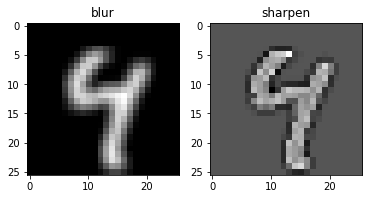

In [19]:
blur_filtered_image = get_filtered_image(blur_filter)
sharpen_filtered_image = get_filtered_image(sharpen_filter)

plt.subplot(1, 2, 1)
plt.title('blur')
plt.imshow(blur_filtered_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('sharpen')
plt.imshow(sharpen_filtered_image, cmap='gray')
plt.show()

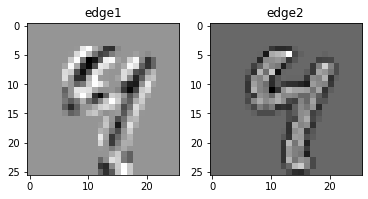

In [20]:
edge_1_filtered_image = get_filtered_image(edge_1_filter)
edge_2_filtered_image = get_filtered_image(edge_2_filter)

plt.subplot(1, 2, 1)
plt.title('edge1')
plt.imshow(edge_1_filtered_image,cmap='gray')

plt.subplot(1, 2, 2)
plt.title('edge2')
plt.imshow(edge_2_filtered_image,cmap='gray')
plt.show()

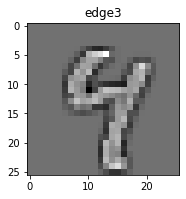

In [21]:
edge_3_filtered_image = get_filtered_image(edge_3_filter)

plt.subplot(1, 2, 1)
plt.title('edge3')
plt.imshow(edge_3_filtered_image,cmap='gray')
plt.show()

#### 이미지 필터를 적용한 결과

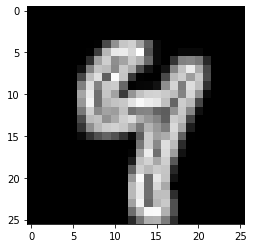

In [22]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image) 
+ np.square(vertical_filtered_image)
+np.square(blur_filtered_image)
+np.square(sharpen_filtered_image))

plt.imshow(sobel_image,cmap='gray')